# Covid19 Analysis

In [38]:
pip install -U folium

     |████████████████████████████████| 94 kB 650 kB/s eta 0:00:01
  Attempting uninstall: folium
    Found existing installation: folium 0.5.0
    Uninstalling folium-0.5.0:
      Successfully uninstalled folium-0.5.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap


In [2]:
df = pd.read_csv("dataset.csv")
m = folium.Map(tiles = 'Stamen Terrain', min_zoom = 1.5)
display(m)

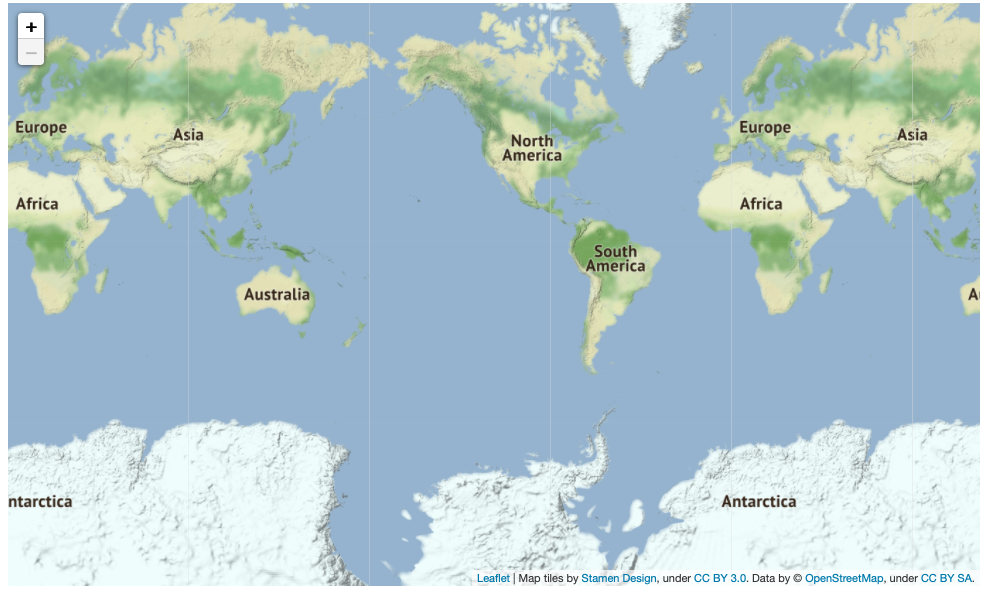

In [3]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Unnamed: 5,Unnamed: 6
0,2020-01-22,Afghanistan,0,0,0,NaN,NaN
1,2020-01-23,Afghanistan,0,0,0,NaN,NaN
2,2020-01-24,Afghanistan,0,0,0,NaN,NaN
3,2020-01-25,Afghanistan,0,0,0,NaN,NaN
4,2020-01-26,Afghanistan,0,0,0,NaN,NaN


In [4]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'


In [7]:

folium.Choropleth(
    geo_data = country_shapes,
    min_zoom = 2,
    name = 'Covid-19',
    data = df,
    columns = ['Country', 'Confirmed'],
    key_on = "feature.properties.name",
    fill_color = 'OrRd', 
    non_fill_color = 'black',
    legend_name = 'Total Confirmed Covid Cases',
    ).add_to(m)

m

 #   key_on="feature.id",


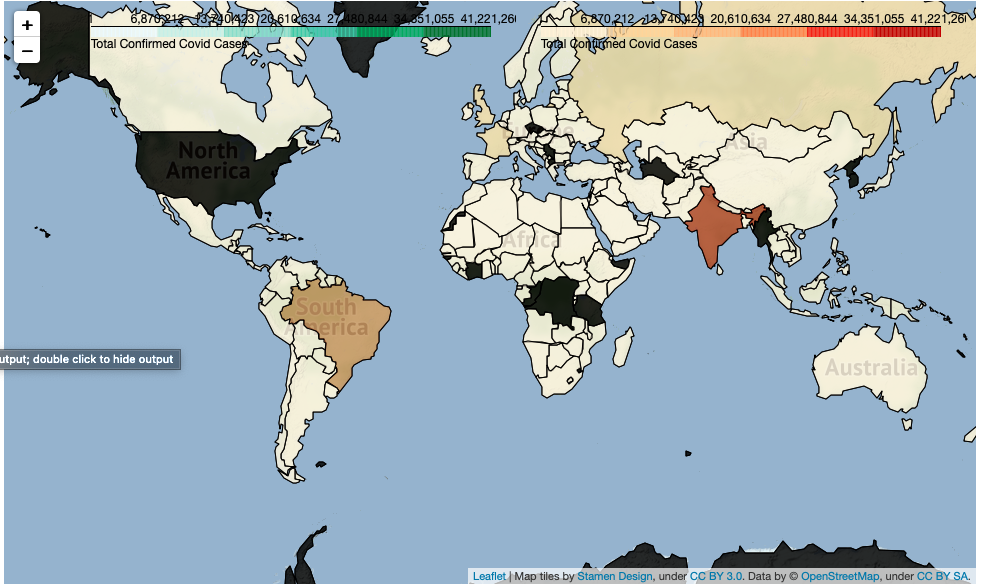

In [18]:
contries_df = pd.read_csv("countries.csv")



In [20]:
contries_df.rename(columns={'country': 'Country'}, inplace=True)
contries_df.head() ##merge edilecek diğer df ile




,country_code,latitude,longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [23]:
inner_merged_total_df = pd.merge(df, contries_df, on=["Country"])



In [24]:
inner_merged_total_df

,Date,Country,Confirmed,Recovered,Deaths,Unnamed: 5,Unnamed: 6,country_code,latitude,longitude
0,2020-01-22,Afghanistan,0,0,0,NaN,NaN,AF,33.939110,67.709953
1,2020-01-23,Afghanistan,0,0,0,NaN,NaN,AF,33.939110,67.709953
2,2020-01-24,Afghanistan,0,0,0,NaN,NaN,AF,33.939110,67.709953
3,2020-01-25,Afghanistan,0,0,0,NaN,NaN,AF,33.939110,67.709953
4,2020-01-26,Afghanistan,0,0,0,NaN,NaN,AF,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...
106372,2021-09-09,Zimbabwe,126056,0,4521,NaN,NaN,ZW,-19.015438,29.154857
106373,2021-09-10,Zimbabwe,126163,0,4532,NaN,NaN,ZW,-19.015438,29.154857
106374,2021-09-11,Zimbabwe,126220,0,4536,NaN,NaN,ZW,-19.015438,29.154857
106375,2021-09-12,Zimbabwe,126269,0,4538,NaN,NaN,ZW,-19.015438,29.154857


In [32]:
merged_df_1309 = inner_merged_total_df[inner_merged_total_df['Date'] =='2021-09-13']

In [34]:
merged_df_1309

,Date,Country,Confirmed,Recovered,Deaths,Unnamed: 5,Unnamed: 6,country_code,latitude,longitude
0,2021-09-13,Afghanistan,0,0,0,NaN,NaN,AF,33.939110,67.709953
1,2021-09-13,Afghanistan,0,0,0,NaN,NaN,AF,33.939110,67.709953
2,2021-09-13,Afghanistan,0,0,0,NaN,NaN,AF,33.939110,67.709953
3,2021-09-13,Afghanistan,0,0,0,NaN,NaN,AF,33.939110,67.709953
4,2021-09-13,Afghanistan,0,0,0,NaN,NaN,AF,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...
106372,2021-09-13,Zimbabwe,126056,0,4521,NaN,NaN,ZW,-19.015438,29.154857
106373,2021-09-13,Zimbabwe,126163,0,4532,NaN,NaN,ZW,-19.015438,29.154857
106374,2021-09-13,Zimbabwe,126220,0,4536,NaN,NaN,ZW,-19.015438,29.154857
106375,2021-09-13,Zimbabwe,126269,0,4538,NaN,NaN,ZW,-19.015438,29.154857


In [ ]:
def plotDot(point):
    folium.CircleMarker(location = (point.latitude, point.longitude),
                       radius = 5,
                       weight = 2,
                       popup = [point.Country, point.Confirmed, point.Recovered],
                       fill_color = '#000000').add_to(m)
    
merged_df_1309.apply(plotDot, axis = 1)
m.fit_bounds(m.get_bounds())
m

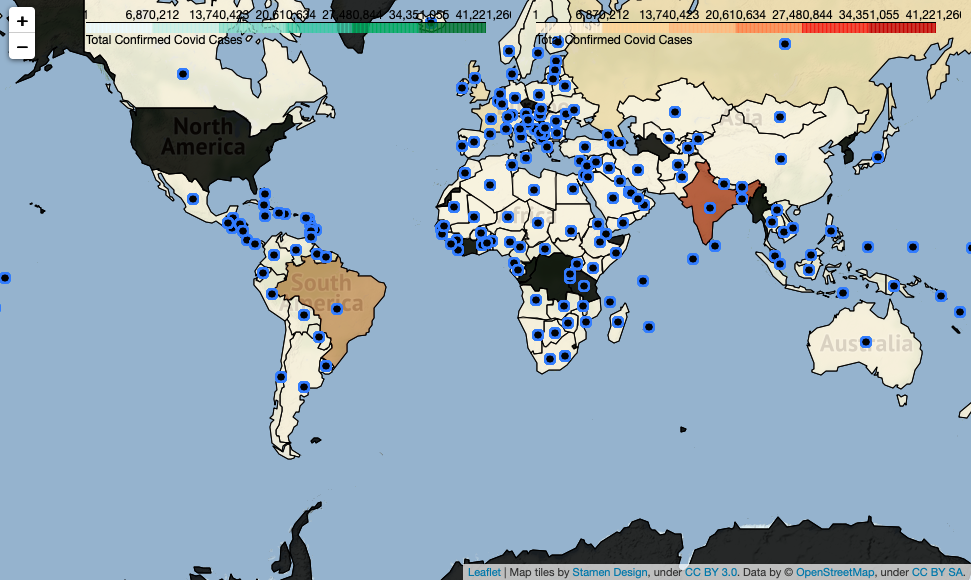